In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [195]:
household_income_df = pd.read_csv('Documents/Github/InvestmentRenaissance/Household Income.csv')
poverty_div_df = pd.read_csv('Documents/Github/InvestmentRenaissance/PovertyDiv.csv')

In [196]:
#Getting the data by Year
poverty_trends = poverty_div_df.groupby("Year")["Poverty Population"].sum().reset_index()

In [197]:
poverty_trends = poverty_trends.sort_values("Year") #Is the data Sorted by Year?

In [198]:
#Time Series Model (Exponential Smoothing) for poverty reduction trend
model = ExponentialSmoothing(poverty_trends["Poverty Population"], trend="add", seasonal=None, seasonal_periods=None)
fitted_model = model.fit()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [204]:
future_years = np.arange(poverty_trends["Year"].max() + 1, poverty_trends["Year"].max() + 11)
future_forecast = pd.Series(fitted_model.forecast(len(future_years)).values, index=future_years)

In [206]:
#simulate an accelerated poverty reduction scenario
#adijusting values
reduction_factor = 0.90  # 10% reduction each year

In [208]:
#Apply the reduction factor to the forecasted poverty population
accelerated_forecast = future_forecast.copy()
for i in range(1, len(accelerated_forecast)):
    accelerated_forecast.iloc[i] = accelerated_forecast.iloc[i-1] * reduction_factor


In [210]:
# Dataframes for Visulization
forecast_df = pd.DataFrame({"Year": future_forecast.index, "Projected Poverty Population": future_forecast.values})
accelerated_df = pd.DataFrame({"Year": accelerated_forecast.index, "Accelerated Poverty Reduction": accelerated_forecast.values})

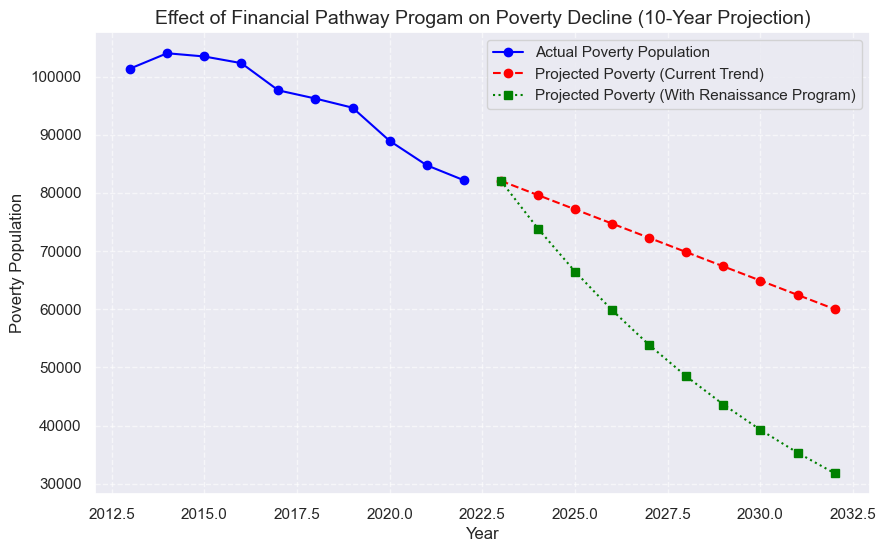

In [246]:
# Plot the comparison: standard vs. accelerated reduction
plt.figure(figsize=(10, 6))

plt.plot(poverty_trends["Year"], poverty_trends["Poverty Population"], 
         marker='o', label="Actual Poverty Population", color='blue')

# Plot projected poverty population (current trend)
plt.plot(forecast_df["Year"], forecast_df["Projected Poverty Population"], 
         marker='o', linestyle="dashed", label="Projected Poverty (Current Trend)", color='red')

# Plot accelerated poverty reduction with financial literacy intervention
plt.plot(accelerated_df["Year"], accelerated_df["Accelerated Poverty Reduction"], 
         marker='s', linestyle="dotted", label="Projected Poverty (With Renaissance Program)", color='green')

# Improve labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Poverty Population", fontsize=12)
plt.title("Effect of Financial Pathway Progam on Poverty Decline (10-Year Projection)", fontsize=14)

# Adjust legend for clarity
plt.legend(fontsize=11, loc="upper right")

#Customize grid for better visibility
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

/var/folders/ll/khj7tmls1txgw9739sn0g8vh0000gn/T/ipykernel_37445/1589744157.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


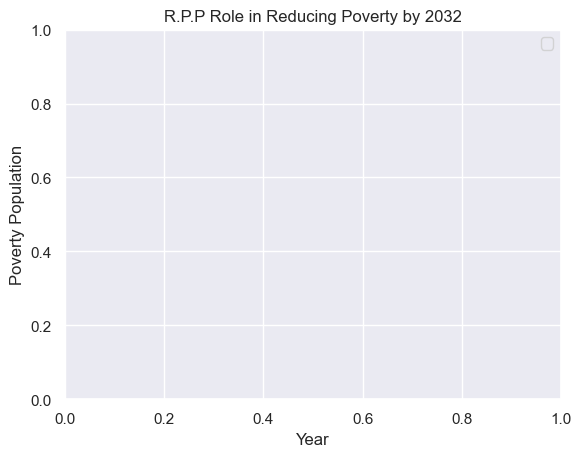

In [240]:
# Customizing Graph Appearance
plt.xlabel("Year")
plt.ylabel("Poverty Population")
plt.title("R.P.P Role in Reducing Poverty by 2032")
plt.legend()
plt.grid(True)
plt.show()

In [236]:

forecast_df.to_csv("Projected_Poverty_Reduction.csv", index=False)
accelerated_df.to_csv("Accelerated_Poverty_Reduction.csv", index=False)
